--- Centroid of Class 1 ---
mfcc1         -405.615709
rms              0.019813
zcr              0.052639
pitch_std       68.515493
silence_pct     36.355289
dtype: float64

--- Spread of Class 1 ---
mfcc1          28.371355
rms             0.007129
zcr             0.007080
pitch_std       7.402770
silence_pct    11.592408
dtype: float64

--- Centroid of Class 2 ---
mfcc1         -382.148256
rms              0.025712
zcr              0.054255
pitch_std       63.826111
silence_pct     42.875337
dtype: float64

--- Spread of Class 2 ---
mfcc1          18.525522
rms             0.006411
zcr             0.005760
pitch_std       3.788114
silence_pct     5.270658
dtype: float64

=== Euclidean Distance Between Centroids: 24.8037


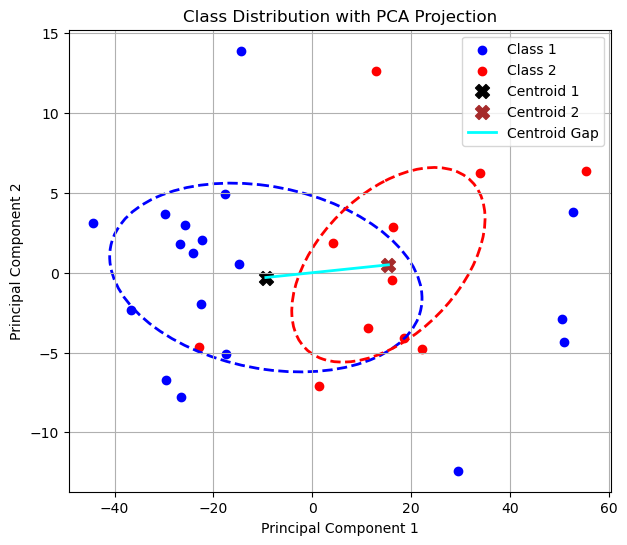

In [5]:
#question - A1(lab -3)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

def summarize_class(data, feature_list, class_label):
    """
    Calculate the centroid (average vector) and spread (standard deviation) for a given class.
    """
    class_subset = data[data['class'] == class_label][feature_list].values
    class_mean = np.mean(class_subset, axis=0)
    class_std = np.std(class_subset, axis=0)
    return class_mean, class_std, class_subset

def euclidean_gap(vector_a, vector_b):
    """
    Find the Euclidean distance between two vectors.
    """
    return np.linalg.norm(vector_a - vector_b)

def visualize_class_distribution(data1, data2, center1, center2):
    """
    Create a PCA-based 2D scatter plot for two classes showing:
    - Class samples
    - Centroids
    - Spread with ellipses
    - Line showing centroid distance
    """
    # Merge for PCA
    combined_data = np.vstack((data1, data2))
    pca = PCA(n_components=2)
    transformed = pca.fit_transform(combined_data)

    # Split back into two classes
    class1_2d = transformed[:len(data1)]
    class2_2d = transformed[len(data1):]

    # Transform centroids
    centers_2d = pca.transform([center1, center2])
    c1_2d, c2_2d = centers_2d

    # Scatter plot for data points
    plt.figure(figsize=(7, 6))
    plt.scatter(class1_2d[:, 0], class1_2d[:, 1], color='blue', label='Class 1')
    plt.scatter(class2_2d[:, 0], class2_2d[:, 1], color='red', label='Class 2')

    # Plot centroids
    plt.scatter(*c1_2d, color='black', marker='X', s=100, label='Centroid 1')
    plt.scatter(*c2_2d, color='brown', marker='X', s=100, label='Centroid 2')

    # Draw distance line
    plt.plot([c1_2d[0], c2_2d[0]], [c1_2d[1], c2_2d[1]], color='cyan', linewidth=2, label='Centroid Gap')

    # Function to draw ellipse for spread
    def add_ellipse(center, pts, clr):
        cov = np.cov(pts, rowvar=False)
        eigvals, eigvecs = np.linalg.eigh(cov)
        order = eigvals.argsort()[::-1]
        eigvals, eigvecs = eigvals[order], eigvecs[:, order]
        angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
        width, height = 2 * np.sqrt(eigvals)
        ellipse = Ellipse(xy=center, width=width, height=height, angle=angle,
                          edgecolor=clr, fc='None', lw=2, linestyle='--')
        plt.gca().add_patch(ellipse)

    add_ellipse(np.mean(class1_2d, axis=0), class1_2d, 'blue')
    add_ellipse(np.mean(class2_2d, axis=0), class2_2d, 'red')

    # Labels and title
    plt.title('Class Distribution with PCA Projection')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    # Load dataset
    file_path = r"D:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
    df = pd.read_csv(file_path)

    # Features to analyze
    feature_cols = ['mfcc1', 'rms', 'zcr', 'pitch_std', 'silence_pct']

    # Get unique classes (select first two)
    unique_classes = df['class'].unique()
    class_a, class_b = unique_classes[0], unique_classes[1]

    # Compute summaries for both classes
    mean_a, std_a, subset_a = summarize_class(df, feature_cols, class_a)
    mean_b, std_b, subset_b = summarize_class(df, feature_cols, class_b)

    # Calculate centroid distance
    gap = euclidean_gap(mean_a, mean_b)

    # Display results
    print(f"--- Centroid of Class {class_a} ---\n{pd.Series(mean_a, index=feature_cols)}\n")
    print(f"--- Spread of Class {class_a} ---\n{pd.Series(std_a, index=feature_cols)}\n")
    print(f"--- Centroid of Class {class_b} ---\n{pd.Series(mean_b, index=feature_cols)}\n")
    print(f"--- Spread of Class {class_b} ---\n{pd.Series(std_b, index=feature_cols)}\n")
    print(f"=== Euclidean Distance Between Centroids: {gap:.4f}")

    # Visualization
    visualize_class_distribution(subset_a, subset_b, mean_a, mean_b)


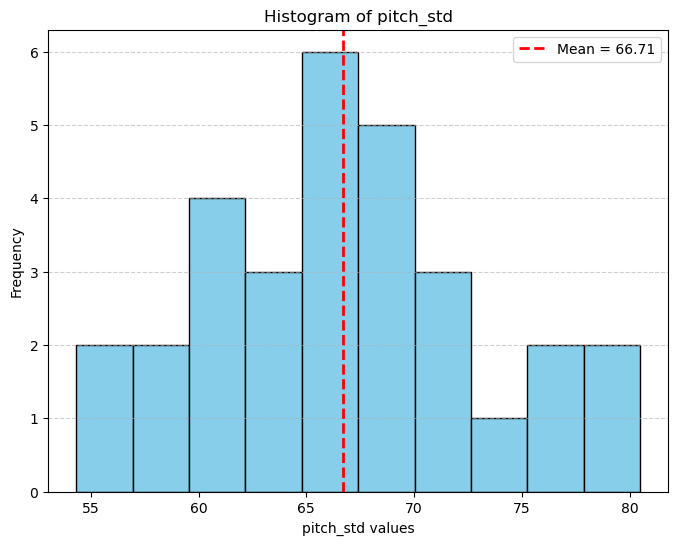

=== Histogram Analysis for Feature: pitch_std ===
Mean of pitch_std: 66.7068
Variance of pitch_std: 43.1729


In [6]:
#question - A2(lab -3)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def analyze_feature_distribution(data, feature_name, bins=10):
    """
    Plot histogram for a selected feature and compute its mean and variance.

    Parameters:
        data (pd.DataFrame): Input dataset
        feature_name (str): Column name of the feature to analyze
        bins (int): Number of bins for histogram

    Returns:
        tuple: (mean_value, variance_value)
    """
    # Extract values for the chosen feature
    feature_values = data[feature_name].values

    # Compute mean and variance
    mean_val = np.mean(feature_values)
    var_val = np.var(feature_values)

    # Create histogram
    plt.figure(figsize=(8, 6))
    plt.hist(feature_values, bins=bins, color='skyblue', edgecolor='black')
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.2f}')

    # Add labels and title
    plt.title(f'Histogram of {feature_name}')
    plt.xlabel(f'{feature_name} values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

    return mean_val, var_val


if __name__ == "__main__":
    # Load the dataset
    file_path = r"D:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
    df = pd.read_csv(file_path)

    # Choose the feature for histogram
    feature_to_plot = 'pitch_std'

    # Perform analysis
    mean_value, variance_value = analyze_feature_distribution(df, feature_to_plot)

    # Print the results
    print(f"=== Histogram Analysis for Feature: {feature_to_plot} ===")
    print(f"Mean of {feature_to_plot}: {mean_value:.4f}")
    print(f"Variance of {feature_to_plot}: {variance_value:.4f}")


Minkowski Distance (r=1): 65.4304
Minkowski Distance (r=2): 46.9592
Minkowski Distance (r=3): 44.1798
Minkowski Distance (r=4): 43.4625
Minkowski Distance (r=5): 43.2433
Minkowski Distance (r=6): 43.1709
Minkowski Distance (r=7): 43.1459
Minkowski Distance (r=8): 43.1371
Minkowski Distance (r=9): 43.1338
Minkowski Distance (r=10): 43.1326


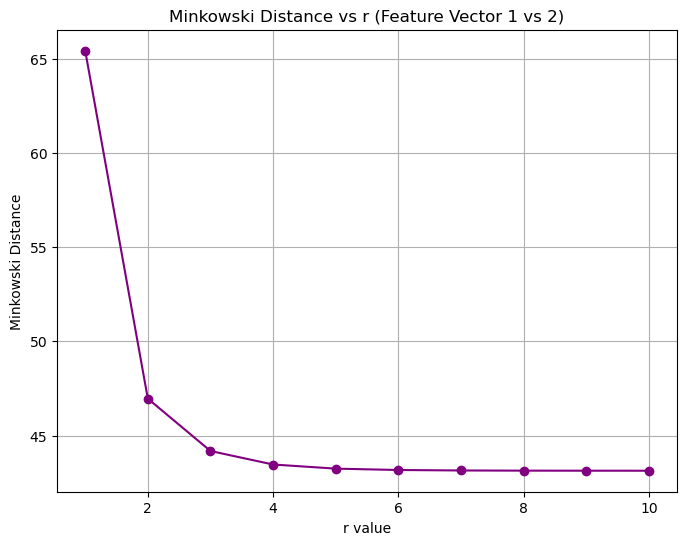

In [7]:
#question - A3(lab -3)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_minkowski_distance(vec1, vec2, r):
    """
    Calculate the Minkowski distance between two vectors for a given r value.
    
    Parameters:
        vec1 (array): First feature vector
        vec2 (array): Second feature vector
        r (int): The order of Minkowski distance
    
    Returns:
        float: Minkowski distance
    """
    return np.power(np.sum(np.abs(vec1 - vec2) ** r), 1 / r)

def minkowski_distance_analysis(data, index1, index2, r_range):
    """
    Compute Minkowski distance for two feature vectors over a range of r values.
    
    Parameters:
        data (pd.DataFrame): Dataset containing feature vectors
        index1 (int): Index of first feature vector
        index2 (int): Index of second feature vector
        r_range (list): List of r values to calculate Minkowski distance
    
    Returns:
        list: Distances for each r in r_range
    """
    vec1 = data.iloc[index1].values
    vec2 = data.iloc[index2].values
    distances = []

    for r in r_range:
        dist = compute_minkowski_distance(vec1, vec2, r)
        distances.append(dist)
        print(f"Minkowski Distance (r={r}): {dist:.4f}")

    return distances

def plot_minkowski_results(r_values, distances, index1, index2):
    """
    Plot Minkowski distance vs r values.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(r_values, distances, marker='o', color='purple')
    plt.title(f'Minkowski Distance vs r (Feature Vector {index1+1} vs {index2+1})')
    plt.xlabel('r value')
    plt.ylabel('Minkowski Distance')
    plt.grid()
    plt.show()


if __name__ == "__main__":
    # Load dataset
    file_path = r"D:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
    df = pd.read_csv(file_path)

    # Select features only (exclude filename and class)
    feature_cols = ['mfcc1', 'rms', 'zcr', 'pitch_std', 'silence_pct']
    feature_data = df[feature_cols]

    # Choose two feature vectors for comparison
    index_vec1 = 0  # First vector
    index_vec2 = 1  # Second vector

    # Define r values (1 to 10)
    r_values = list(range(1, 11))

    # Compute Minkowski distances
    minkowski_distances = minkowski_distance_analysis(feature_data, index_vec1, index_vec2, r_values)

    # Plot results
    plot_minkowski_results(r_values, minkowski_distances, index_vec1, index_vec2)


In [8]:
#question - A4(lab -3)
import pandas as pd
from sklearn.model_selection import train_test_split

if __name__ == "__main__":
    # Load dataset
    file_path = r"D:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
    df = pd.read_csv(file_path)

    # Separate features and target
    feature_cols = ['mfcc1', 'rms', 'zcr', 'pitch_std', 'silence_pct']
    X = df[feature_cols]
    y = df['class']

    # Perform train-test split (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Print dataset size details
    print(f"Total samples: {len(df)}")
    print(f"Training samples: {len(X_train)}")
    print(f"Testing samples: {len(X_test)}\n")

    # Show first 5 training and testing labels
    print("--- First 5 Training Labels ---")
    print(y_train.head(), "\n")

    print("--- First 5 Test Labels ---")
    print(y_test.head())


Total samples: 30
Training samples: 21
Testing samples: 9

--- First 5 Training Labels ---
0     1
4     1
16    1
5     1
13    2
Name: class, dtype: int64 

--- First 5 Test Labels ---
27    2
15    1
23    2
17    2
8     1
Name: class, dtype: int64


In [10]:
#question - A5(lab -3)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

print("===== kNN Classifier Results =====")

# Load the dataset
data_path = r"D:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
df = pd.read_csv(data_path)

# Separate features and labels
X = df[['mfcc1', 'rms', 'zcr', 'pitch_std', 'silence_pct']]
y = df['class']

# Train-test split: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize kNN model with k=3
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%\n")

# Print classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=2))



===== kNN Classifier Results =====
Accuracy on test set: 88.89%

Classification Report:
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      0.80      0.89         5

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



In [11]:
#question - A6(lab -3)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the data
dataset_path = r"D:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
df = pd.read_csv(dataset_path)

# Select input features and output label
input_features = ['mfcc1', 'rms', 'zcr', 'pitch_std', 'silence_pct']
X = df[input_features]
y = df['class']

# Split data into training and testing portions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train the kNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and evaluate
predictions = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions) * 100

# Print formatted accuracy
print("===================================")
print(f"kNN Classifier Accuracy: {test_accuracy:.2f}%")
print("===================================")


kNN Classifier Accuracy: 88.89%


In [13]:
#question - A7(lab -3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load dataset from path
csv_path = r"D:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
data = pd.read_csv(csv_path)

# Define input columns and target column
input_cols = ['mfcc1', 'rms', 'zcr', 'pitch_std', 'silence_pct']
X = data[input_cols]
y = data['class']

# Split the data into training and test portions
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the kNN model
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_tr, y_tr)

# Predict all test labels
all_preds = knn_classifier.predict(X_te)

# Print prediction comparison
print("=== Predictions for All Test Vectors ===")
print(f"Predicted Labels : {list(all_preds)}")
print(f"Actual Labels    : {list(y_te.values)}\n")

# Predict a single sample (e.g., first test row)
sample_index = 0
test_sample = X_te.iloc[[sample_index]]  # Keep feature names
predicted_value = knn_classifier.predict(test_sample)[0]
true_value = y_te.iloc[sample_index]

# Display results for the selected sample
print("=== Prediction for a Single Test Vector ===")
print(f"Test Vector Index : {sample_index}")
print(f"Predicted Class   : {predicted_value}")
print(f"Actual Class      : {true_value}")


=== Predictions for All Test Vectors ===
Predicted Labels : [2, 1, 2, 2, 1, 1, 1, 1, 2]
Actual Labels    : [2, 1, 2, 2, 1, 1, 1, 2, 2]

=== Prediction for a Single Test Vector ===
Test Vector Index : 0
Predicted Class   : 2
Actual Class      : 2


=== Accuracy Report ===
k = 1 -> Accuracy = 0.8889
k = 2 -> Accuracy = 0.8889
k = 3 -> Accuracy = 0.8889
k = 4 -> Accuracy = 0.7778
k = 5 -> Accuracy = 0.7778
k = 6 -> Accuracy = 0.7778
k = 7 -> Accuracy = 0.7778
k = 8 -> Accuracy = 0.7778
k = 9 -> Accuracy = 0.7778
k = 10 -> Accuracy = 1.0000
k = 11 -> Accuracy = 0.4444


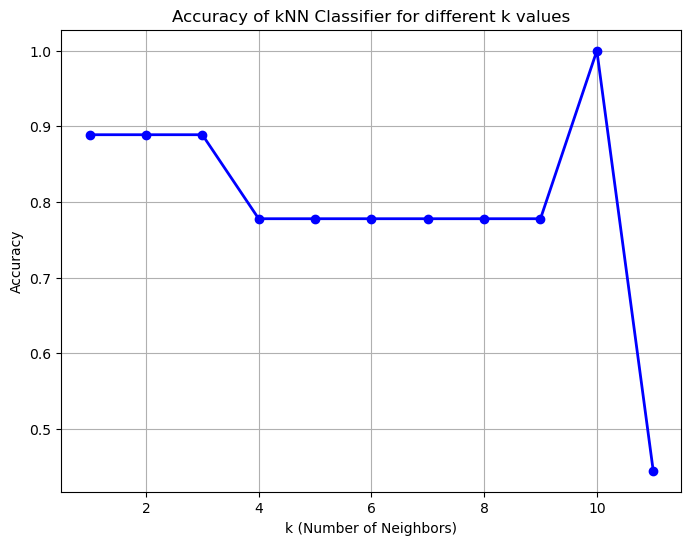

In [20]:
#question - A8(lab -3)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = r"D:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
df = pd.read_csv(file_path)

# Select only numeric features for training
selected_features = ['mfcc1', 'rms', 'zcr', 'pitch_std', 'silence_pct']
X = df[selected_features].astype(np.float64)
y = df['class'].astype(int)

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ensure X arrays are contiguous and of valid type for sklearn internals
X_train = np.ascontiguousarray(X_train, dtype=np.float64)
X_test = np.ascontiguousarray(X_test, dtype=np.float64)

# Prepare for storing results
k_range = list(range(1, 12))
accuracy_scores = []

print("=== Accuracy Report ===")
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    accuracy_scores.append(acc)
    print(f"k = {k} -> Accuracy = {acc:.4f}")

# Plot the accuracy values against k
plt.figure(figsize=(8, 6))
plt.plot(k_range, accuracy_scores, marker='o', color='blue', linewidth=2)
plt.title("Accuracy of kNN Classifier for different k values")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


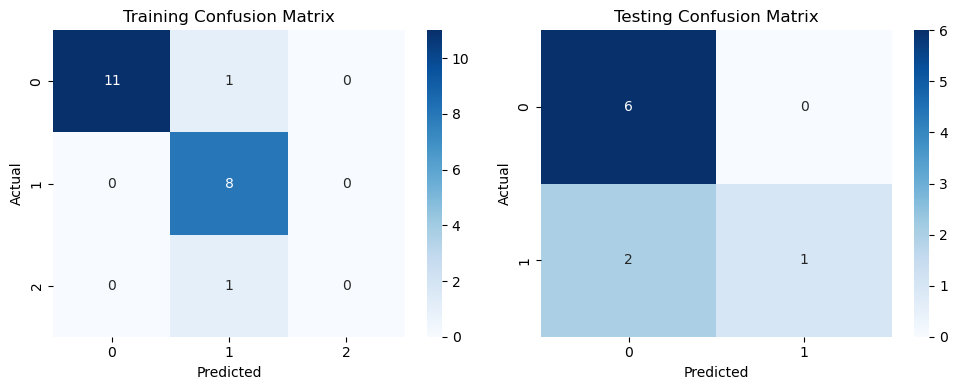

==== Training Report ====
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       0.80      1.00      0.89         8
           3       0.00      0.00      0.00         1

    accuracy                           0.90        21
   macro avg       0.60      0.64      0.62        21
weighted avg       0.88      0.90      0.89        21

==== Testing Report ====
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         6
           2       1.00      0.33      0.50         3

    accuracy                           0.78         9
   macro avg       0.88      0.67      0.68         9
weighted avg       0.83      0.78      0.74         9

Train Accuracy: 0.9048
Test Accuracy : 0.7778
>>> Model may be OVERFITTING


In [23]:
#question - A9(lab -3)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
file_path = r"D:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
df = pd.read_csv(file_path)

# Drop non-numeric or irrelevant columns (e.g., file names)
# Adjust the column name below if it's something other than 'filename'
if 'filename' in df.columns:
    df = df.drop(columns=['filename'])

# Define numeric feature columns (update as per your dataset)
numeric_columns = ['mfcc1', 'rms', 'zcr', 'pitch_std', 'silence_pct']
X = df[numeric_columns].astype(np.float64)
y = df['class'].astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train kNN classifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Make predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Plot confusion matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_train, train_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, test_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Display classification reports
print("==== Training Report ====")
print(classification_report(y_train, train_preds, zero_division=0))

print("==== Testing Report ====")
print(classification_report(y_test, test_preds, zero_division=0))

# Accuracy and performance summary
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")

if train_acc > test_acc:
    print(">>> Model may be OVERFITTING")
elif test_acc > train_acc:
    print(">>> Model may be UNDERFITTING")
else:
    print(">>> Model appears WELL-FITTED")


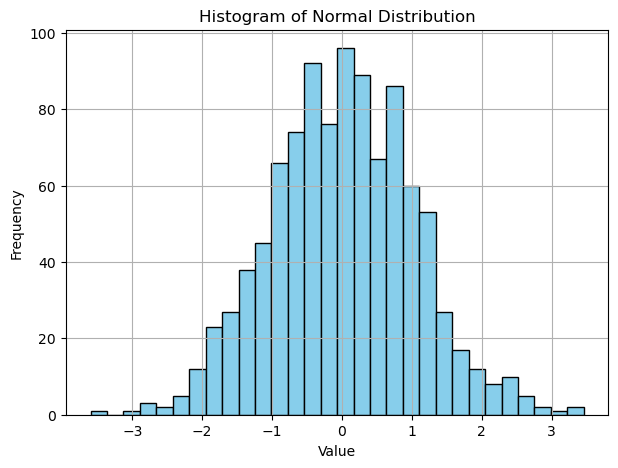

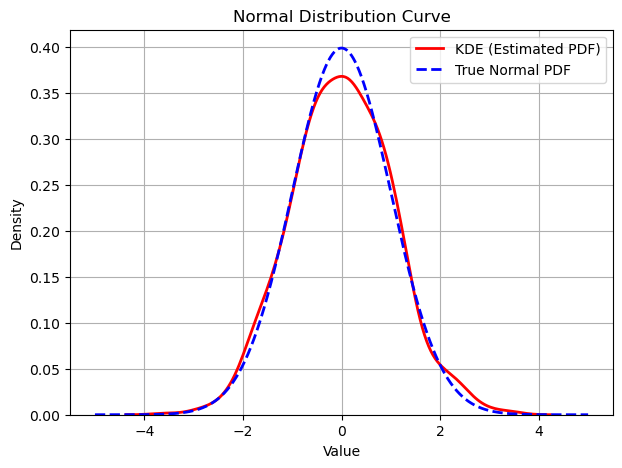

In [25]:
#practice question - 1(lab -3)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Generate 1000 random samples from standard normal distribution
data = np.random.randn(1000)

# Part A: Histogram of the normal distribution
plt.figure(figsize=(7, 5))
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Part B: KDE and True Normal PDF curve
plt.figure(figsize=(7, 5))

# KDE (Estimated PDF) using seaborn
sns.kdeplot(data, color='red', label='KDE (Estimated PDF)', linewidth=2)

# True Normal PDF
x_vals = np.linspace(-5, 5, 1000)
true_pdf = norm.pdf(x_vals, loc=0, scale=1)
plt.plot(x_vals, true_pdf, 'b--', label='True Normal PDF', linewidth=2)

plt.title("Normal Distribution Curve")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()



===== Accuracy Report =====
Metric: euclidean () -> Accuracy: 0.8889
Metric: manhattan () -> Accuracy: 0.8889
Metric: chebyshev () -> Accuracy: 0.7778
Metric: minkowski {'p': 3} -> Accuracy: 0.7778
Metric: minkowski {'p': 4} -> Accuracy: 0.7778


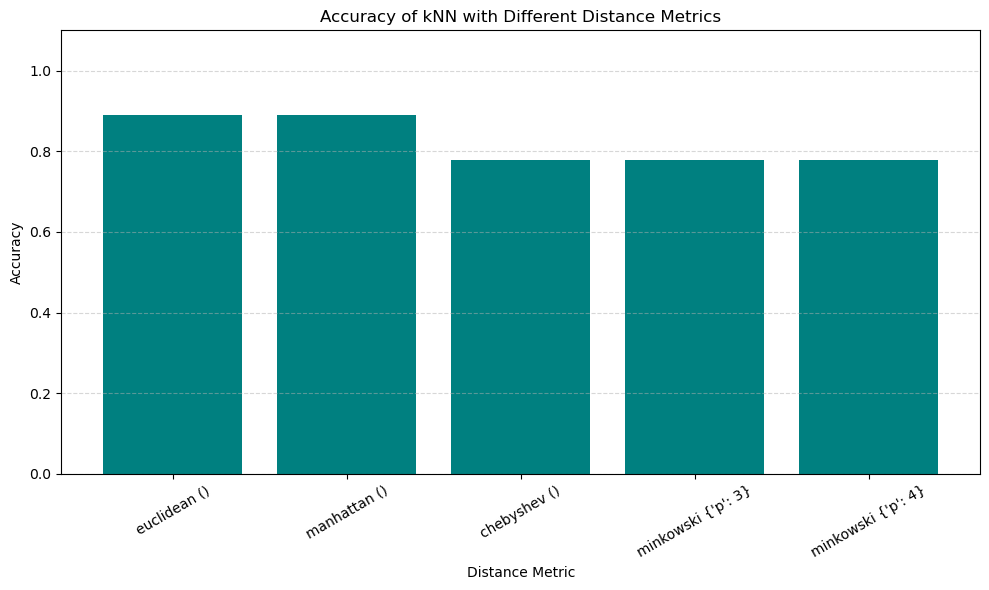

In [28]:
#practice question - 2(lab -3)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset from provided path
file_path = r"D:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
df = pd.read_csv(file_path)

# Drop non-numeric columns (like filenames)
df_numeric = df.select_dtypes(include=[np.number])

# Extract features and labels
X = df_numeric.iloc[:, :-1].values
y = df_numeric.iloc[:, -1].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Distance metrics to evaluate
distance_metrics = [
    ("euclidean", {}),
    ("manhattan", {}),
    ("chebyshev", {}),
    ("minkowski", {"p": 3}),
    ("minkowski", {"p": 4})
]

accuracies = []
labels = []

print("\n===== Accuracy Report =====")
for metric, params in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric, **params)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    label = f"{metric} {params}" if params else f"{metric} ()"
    labels.append(label)
    accuracies.append(acc)
    print(f"Metric: {label} -> Accuracy: {acc:.4f}")

# Plot accuracy chart
plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color='teal')
plt.title("Accuracy of kNN with Different Distance Metrics")
plt.xlabel("Distance Metric")
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


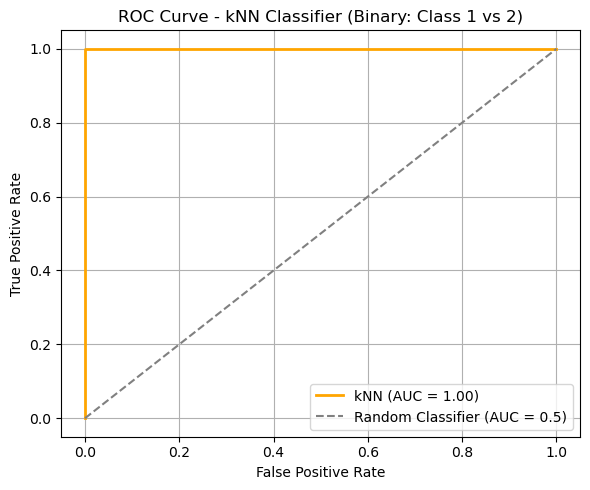

In [29]:
#practice question - 3(lab -3)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

# Load the dataset (update path if needed)
file_path = r"D:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
df = pd.read_csv(file_path)

# Drop non-numeric columns (like filenames if present)
df = df.select_dtypes(include=[np.number])

# Filter for binary classification (class 1 vs 2)
df_binary = df[df.iloc[:, -1].isin([1, 2])]

# Split features and labels
X = df_binary.iloc[:, :-1].values
y = df_binary.iloc[:, -1].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train kNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Get prediction probabilities
y_probs = knn.predict_proba(X_test)

# Convert labels to binary (Class 1 vs Class 2)
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test).ravel()

# Use probabilities for Class 2 (index 1)
fpr, tpr, _ = roc_curve(y_test_binary, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'kNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.title('ROC Curve - kNN Classifier (Binary: Class 1 vs 2)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


Available columns in the dataset:
 ['filename', 'mfcc1', 'rms', 'zcr', 'pitch_std', 'silence_pct', 'class']

===== Training Set Classification Report =====
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.71      0.83      0.77         6
           3       0.00      0.00      0.00         1

    accuracy                           0.86        21
   macro avg       0.55      0.59      0.57        21
weighted avg       0.82      0.86      0.84        21



C:\Users\Rithvik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rithvik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rithvik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


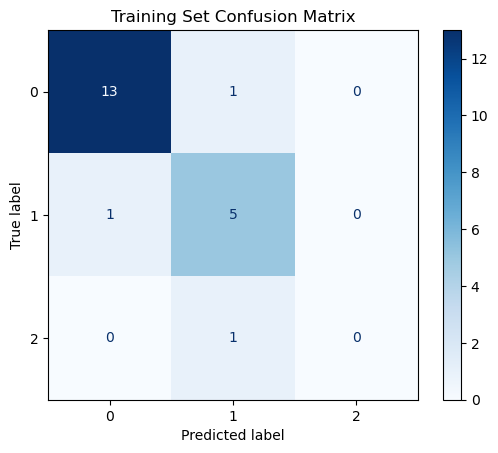


===== Testing Set Classification Report =====
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      0.60      0.75         5

    accuracy                           0.78         9
   macro avg       0.83      0.80      0.77         9
weighted avg       0.85      0.78      0.77         9



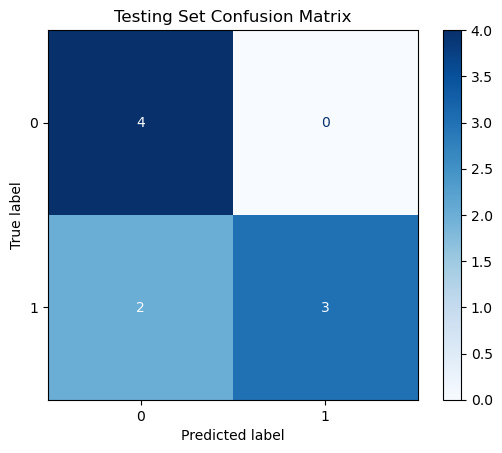

In [31]:
#question - A1(lab -4)
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load and prepare data
def load_and_prepare_data(csv_path):
    df = pd.read_csv(csv_path)
    print("Available columns in the dataset:\n", df.columns.tolist())
    
    # Use valid feature names from dataset
    valid_features = ['mfcc1', 'rms', 'zcr', 'pitch_std']  # Remove 'silence_pc'
    X = df[valid_features].values
    y = df['class'].values
    return X, y

# Train kNN model
def train_knn(X_train, y_train, k=3):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model

# Evaluate model
def evaluate_model(y_true, y_pred, title):
    print(f"\n===== {title} Classification Report =====")
    print(classification_report(y_true, y_pred))
    
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'{title} Confusion Matrix')
    plt.show()

# Main program
if __name__ == "__main__":
    # Update with your dataset path
    file_path = r"D:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
    
    # Load and split data
    X, y = load_and_prepare_data(file_path)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train model
    k_value = 3
    classifier = train_knn(X_train, y_train, k=k_value)
    
    # Predict and evaluate
    train_preds = classifier.predict(X_train)
    test_preds = classifier.predict(X_test)
    
    evaluate_model(y_train, train_preds, "Training Set")
    evaluate_model(y_test, test_preds, "Testing Set")


In [33]:
#question - A2(lab -4)
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Function to load and prepare regression dataset
def load_regression_data(csv_path):
    df = pd.read_csv(csv_path)
    
    # We'll predict 'mfcc1' using other numeric features
    target = 'mfcc1'
    features = ['rms', 'zcr', 'pitch_std']  # use actual feature names available
    X = df[features].values
    y = df[target].values
    return X, y

# Function to evaluate regression model
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print("\n===== Regression Evaluation Metrics =====")
    print(f"MSE (Mean Squared Error): {mse:.4f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
    print(f"MAPE (Mean Absolute Percentage Error): {mape:.4f}")
    print(f"R² Score: {r2:.4f}")

# Main block
if __name__ == "__main__":
    data_path = r"D:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
    
    # Load data
    X, y = load_regression_data(data_path)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    evaluate_regression(y_test, y_pred)



===== Regression Evaluation Metrics =====
MSE (Mean Squared Error): 32.4153
RMSE (Root Mean Squared Error): 5.6934
MAPE (Mean Absolute Percentage Error): 0.0102
R² Score: 0.9556


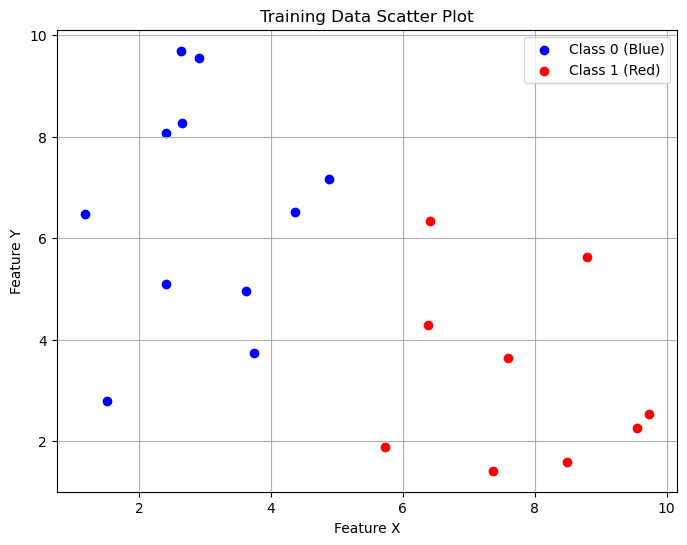

In [34]:
#question - A3(lab -4)
import numpy as np
import matplotlib.pyplot as plt

# Function to generate training data
def create_training_points(num_points=20, seed=42):
    np.random.seed(seed)
    
    # Generate X and Y values between 1 and 10
    X_vals = np.random.uniform(1, 10, num_points)
    Y_vals = np.random.uniform(1, 10, num_points)
    
    # Combine X and Y into a feature matrix
    features = np.column_stack((X_vals, Y_vals))
    
    # Assign class labels: Red (1) if X > Y, else Blue (0)
    labels = np.where(X_vals > Y_vals, 1, 0)
    
    return features, labels

# Function to plot training data
def plot_training_data(features, labels):
    # Split data based on class
    blue_points = features[labels == 0]
    red_points = features[labels == 1]
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Class 0 (Blue)')
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Class 1 (Red)')
    plt.title("Training Data Scatter Plot")
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.legend()
    plt.grid(True)
    plt.show()

# Main block
if __name__ == "__main__":
    training_features, training_labels = create_training_points()
    plot_training_data(training_features, training_labels)


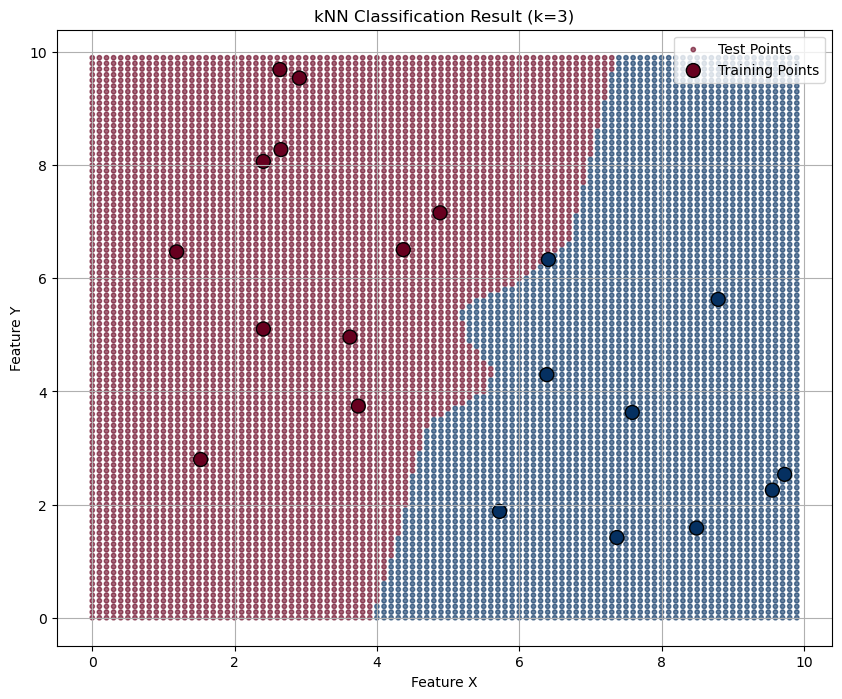

In [35]:
#question - A4(lab -4)
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Function to generate training data
def create_training_points(num_points=20, seed=42):
    np.random.seed(seed)
    X_vals = np.random.uniform(1, 10, num_points)
    Y_vals = np.random.uniform(1, 10, num_points)
    features = np.column_stack((X_vals, Y_vals))
    labels = np.where(X_vals > Y_vals, 1, 0)  # Class 1 (Red) if X > Y, else Class 0 (Blue)
    return features, labels

# Function to generate test grid data
def generate_test_grid(x_range=(0, 10), y_range=(0, 10), step=0.1):
    x_vals = np.arange(x_range[0], x_range[1], step)
    y_vals = np.arange(y_range[0], y_range[1], step)
    grid_x, grid_y = np.meshgrid(x_vals, y_vals)
    test_points = np.c_[grid_x.ravel(), grid_y.ravel()]
    return test_points, grid_x, grid_y

# Function to train kNN and predict test classes
def classify_and_plot(training_features, training_labels, test_points, k=3):
    # Train the kNN model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(training_features, training_labels)

    # Predict class for test grid points
    predicted_classes = knn_model.predict(test_points)

    # Plot the results
    plt.figure(figsize=(10, 8))
    plt.scatter(test_points[:, 0], test_points[:, 1], c=predicted_classes, cmap=plt.cm.RdBu, alpha=0.6, s=10, label="Test Points")
    plt.scatter(training_features[:, 0], training_features[:, 1], c=training_labels, cmap=plt.cm.RdBu, edgecolors='black', s=100, label="Training Points")
    plt.title("kNN Classification Result (k=3)")
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    # Generate training and test data
    train_data, train_labels = create_training_points()
    test_data, _, _ = generate_test_grid()

    # Classify and plot
    classify_and_plot(train_data, train_labels, test_data, k=3)


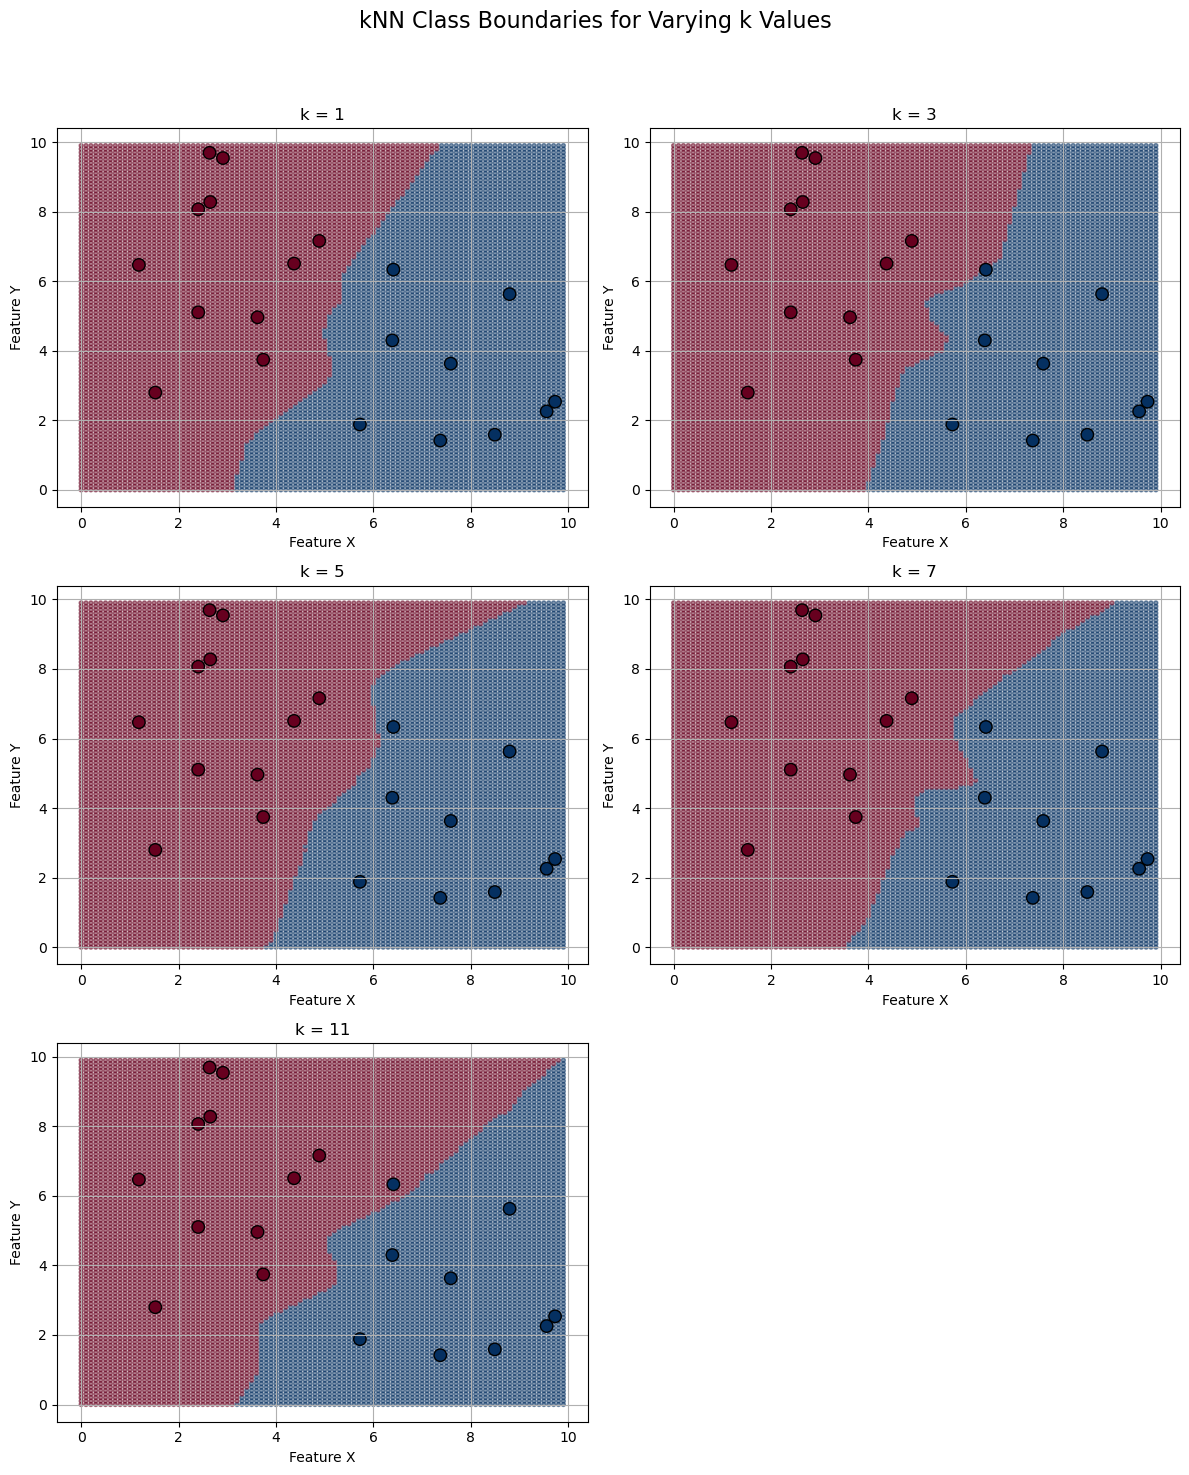

In [37]:
#question - A5(lab -4)
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import math

# Generate synthetic training data
def generate_training_data(num_samples=20, seed=42):
    np.random.seed(seed)
    x = np.random.uniform(1, 10, num_samples)
    y = np.random.uniform(1, 10, num_samples)
    features = np.column_stack((x, y))
    labels = np.where(x > y, 1, 0)  # Class 1 if x > y, else 0
    return features, labels

# Generate a dense test grid
def generate_test_grid(step=0.1):
    x_vals = np.arange(0, 10, step)
    y_vals = np.arange(0, 10, step)
    xx, yy = np.meshgrid(x_vals, y_vals)
    test_points = np.c_[xx.ravel(), yy.ravel()]
    return test_points, xx, yy

# Visualize decision boundaries for different k
def visualize_knn_boundaries(X_train, y_train, X_test, k_list):
    num_k = len(k_list)
    rows = math.ceil(num_k / 2)
    cols = 2 if num_k > 1 else 1

    plt.figure(figsize=(6 * cols, 5 * rows))
    for idx, k in enumerate(k_list):
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        plt.subplot(rows, cols, idx + 1)
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.RdBu, s=8, alpha=0.5)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='black', s=80)
        plt.title(f"k = {k}")
        plt.xlabel("Feature X")
        plt.ylabel("Feature Y")
        plt.grid(True)

    plt.suptitle("kNN Class Boundaries for Varying k Values", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Main execution
if __name__ == "__main__":
    train_X, train_y = generate_training_data()
    test_X, _, _ = generate_test_grid()
    k_values = [1, 3, 5, 7, 11]  # Try more values if needed
    visualize_knn_boundaries(train_X, train_y, test_X, k_values)


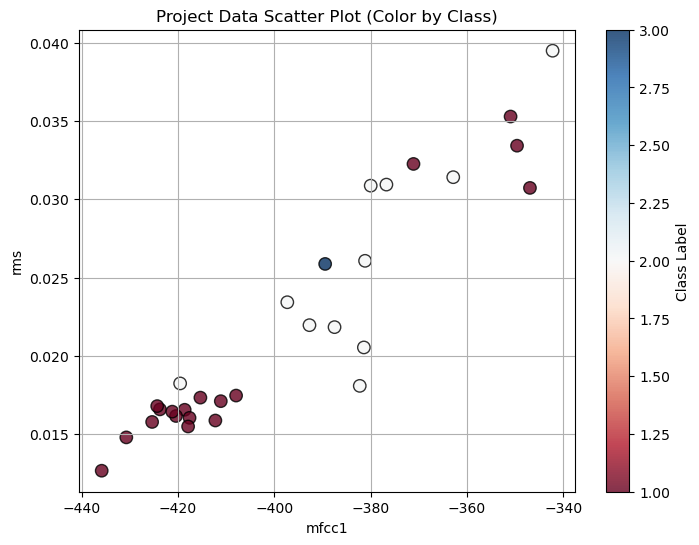

In [38]:
#question - A6(lab -4)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your project data
file_path = r"D:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
df = pd.read_csv(file_path)

# Pick two features — change if needed
feature_x = 'mfcc1'
feature_y = 'rms'
class_label = 'class'

# Filter required columns
X = df[[feature_x, feature_y]].values
y = df[class_label].values

# Plot training data with class color
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k', s=80, alpha=0.8)
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("Project Data Scatter Plot (Color by Class)")
plt.grid(True)
plt.colorbar(scatter, label="Class Label")
plt.show()


In [39]:
#question - A7(lab -4)
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data_path = r"D:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
df = pd.read_csv(data_path)

# Select two features for classification
selected_features = ['mfcc1', 'rms']  # Change if needed
X = df[selected_features].values
y = df['class'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Set up parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 21)),  # Try k values from 1 to 20
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the kNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Run grid search
grid_search.fit(X_train, y_train)

# Display best parameters
print("\n===== Best Hyperparameters =====")
print(grid_search.best_params_)

# Evaluate on test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

print("\n===== Test Classification Report =====")
print(classification_report(y_test, y_pred))
print(f"Accuracy on test data: {accuracy_score(y_test, y_pred):.4f}")


Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\Rithvik\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



===== Best Hyperparameters =====
{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

===== Test Classification Report =====
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      0.40      0.57         5
           3       0.00      0.00      0.00         0

    accuracy                           0.67         9
   macro avg       0.56      0.47      0.46         9
weighted avg       0.85      0.67      0.67         9

Accuracy on test data: 0.6667


C:\Users\Rithvik\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.86 0.86 0.86 0.86 0.81 0.86 0.81 0.86 0.86 0.86 0.81 0.86 0.67 0.86
 0.62 0.86 0.67 0.86 0.67 0.86 0.67 0.86 0.67 0.81 0.67 0.81 0.67 0.81
 0.67 0.81 0.67 0.81  nan  nan  nan  nan  nan  nan  nan  nan 0.86 0.86
 0.86 0.86 0.81 0.86 0.81 0.86 0.86 0.86 0.81 0.86 0.67 0.86 0.62 0.86
 0.67 0.86 0.67 0.86 0.67 0.86 0.67 0.81 0.67 0.81 0.67 0.81 0.67 0.81
 0.67 0.81 0.67  nan 0.67  nan 0.67  nan 0.67  nan]
  warnings.warn(
C:\Users\Rithvik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rithvik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F

In [4]:
#question - A1(lab -5)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset (corrected path)
data = pd.read_csv(r"D:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv")

# Choose feature and target
feature = 'rms'
target = 'mfcc1'

# Define input and output variables
X = data[[feature]]  # Independent variable (single feature)
y = data[target]     # Target variable

# Split into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

def train_single_feature_lr(train_X, train_y):
    """
    Train a Linear Regression model using one feature.
    """
    model = LinearRegression()
    model.fit(train_X, train_y)
    return model

# Train the model
model_a1 = train_single_feature_lr(X_train, y_train)

# Predictions for both train and test sets
y_train_pred = model_a1.predict(X_train)
y_test_pred = model_a1.predict(X_test)

# Display sample predictions
print("A1 completed: Model trained and predictions generated.\n")
print("Sample Predictions on Test Set:")
for actual, predicted in zip(y_test[:5], y_test_pred[:5]):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")


A1 completed: Model trained and predictions generated.

Sample Predictions on Test Set:
Actual: -387.50, Predicted: -396.27
Actual: -423.76, Predicted: -415.91
Actual: -376.72, Predicted: -362.23
Actual: -379.98, Predicted: -362.49
Actual: -420.43, Predicted: -417.49



A2: Regression Metrics for Single Feature Model
Training Metrics:
MSE: 105.1238
RMSE: 10.2530
MAPE: 0.0203
R2: 0.8545

Testing Metrics:
MSE: 91.0210
RMSE: 9.5405
MAPE: 0.0202
R2: 0.8752


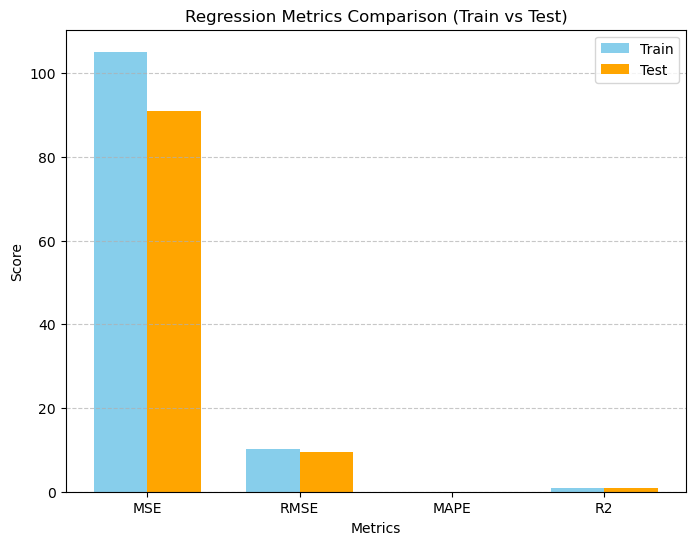

In [6]:
#question - A2(lab -5)
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def calculate_regression_metrics(actual_values, predicted_values):
    """
    Compute MSE, RMSE, MAPE, and R2 score for regression predictions.
    """
    mse = mean_squared_error(actual_values, predicted_values)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(actual_values, predicted_values)
    r2 = r2_score(actual_values, predicted_values)
    
    return {
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "R2": r2
    }

# Calculate metrics for training and testing sets
train_metrics_a2 = calculate_regression_metrics(y_train, y_train_pred)
test_metrics_a2 = calculate_regression_metrics(y_test, y_test_pred)

# Display numeric results
print("\nA2: Regression Metrics for Single Feature Model")
print("Training Metrics:")
for metric, value in train_metrics_a2.items():
    print(f"{metric}: {value:.4f}")

print("\nTesting Metrics:")
for metric, value in test_metrics_a2.items():
    print(f"{metric}: {value:.4f}")

# Prepare data for bar plot
metrics_names = list(train_metrics_a2.keys())
train_values = list(train_metrics_a2.values())
test_values = list(test_metrics_a2.values())

x = np.arange(len(metrics_names))  # Metric positions
width = 0.35  # Width of bars

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, train_values, width, label='Train', color='skyblue')
plt.bar(x + width/2, test_values, width, label='Test', color='orange')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Regression Metrics Comparison (Train vs Test)')
plt.xticks(x, metrics_names)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




A3: Regression Metrics for Multiple Feature Model
Training Metrics:
MSE: 26.2557
RMSE: 5.1240
MAPE: 0.0113
R2: 0.9637

Testing Metrics:
MSE: 37.8622
RMSE: 6.1532
MAPE: 0.0113
R2: 0.9481


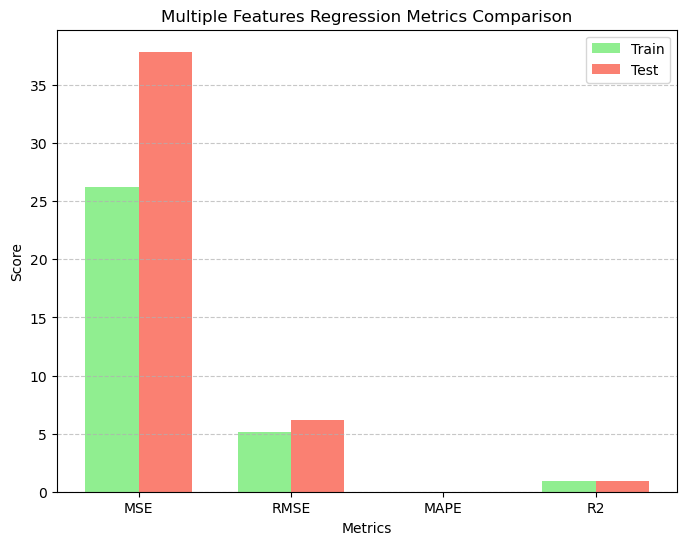

In [7]:
#question - A3(lab -5)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv(r"D:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv")

# Select multiple numeric features (exclude target and class)
feature_columns = ['rms', 'zcr', 'pitch_std', 'silence_pct']
target_column = 'mfcc1'

X_multi = data[feature_columns]
y_multi = data[target_column]

# Split into training and test sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.3, random_state=42
)

# Function to train linear regression with multiple features
def train_multi_feature_lr(train_X, train_y):
    """
    Train a Linear Regression model using multiple features.
    """
    model = LinearRegression()
    model.fit(train_X, train_y)
    return model

# Train the model
model_a3 = train_multi_feature_lr(X_train_multi, y_train_multi)

# Predictions
y_train_pred_multi = model_a3.predict(X_train_multi)
y_test_pred_multi = model_a3.predict(X_test_multi)

# Function to calculate metrics
def calculate_regression_metrics(actual_values, predicted_values):
    mse = mean_squared_error(actual_values, predicted_values)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(actual_values, predicted_values)
    r2 = r2_score(actual_values, predicted_values)
    return {"MSE": mse, "RMSE": rmse, "MAPE": mape, "R2": r2}

# Compute metrics
train_metrics_a3 = calculate_regression_metrics(y_train_multi, y_train_pred_multi)
test_metrics_a3 = calculate_regression_metrics(y_test_multi, y_test_pred_multi)

# Display numeric results
print("\nA3: Regression Metrics for Multiple Feature Model")
print("Training Metrics:")
for metric, value in train_metrics_a3.items():
    print(f"{metric}: {value:.4f}")

print("\nTesting Metrics:")
for metric, value in test_metrics_a3.items():
    print(f"{metric}: {value:.4f}")

# ---- Optional Visualization ----
metrics_names = list(train_metrics_a3.keys())
train_values = list(train_metrics_a3.values())
test_values = list(test_metrics_a3.values())

x = np.arange(len(metrics_names))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, train_values, width, label='Train', color='lightgreen')
plt.bar(x + width/2, test_values, width, label='Test', color='salmon')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Multiple Features Regression Metrics Comparison')
plt.xticks(x, metrics_names)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [8]:
#question - A4(lab -5)
import pandas as pd
from sklearn.cluster import KMeans

# Load dataset
data = pd.read_csv(r"D:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv")

# Remove target and filename columns for clustering
clustering_features = ['rms', 'zcr', 'pitch_std', 'silence_pct']
X_cluster = data[clustering_features]

def perform_kmeans(data, clusters, random_state=42):
    """
    Apply K-Means clustering and return the model, cluster labels, and cluster centers.
    """
    kmeans = KMeans(n_clusters=clusters, random_state=random_state, n_init="auto")
    kmeans.fit(data)
    return kmeans, kmeans.labels_, kmeans.cluster_centers_

# Perform KMeans with k=2
kmeans_model, cluster_labels, cluster_centers = perform_kmeans(X_cluster, clusters=2)

# Display results
print("A4: K-Means Clustering Completed (k=2)")
print("Cluster Centers:")
print(cluster_centers)
print("\nCluster Labels for each data point:")
print(cluster_labels)


A4: K-Means Clustering Completed (k=2)
Cluster Centers:
[[1.71702616e-02 5.20604639e-02 6.97571133e+01 3.19570302e+01]
 [2.96887914e-02 5.51658074e-02 6.21313177e+01 4.90674515e+01]]

Cluster Labels for each data point:
[0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1]


C:\Users\Rithvik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Clustering Metrics for K-Means (k=2)
Silhouette Score: 0.4651
Calinski-Harabasz Score: 39.6565
Davies-Bouldin Index: 0.7389


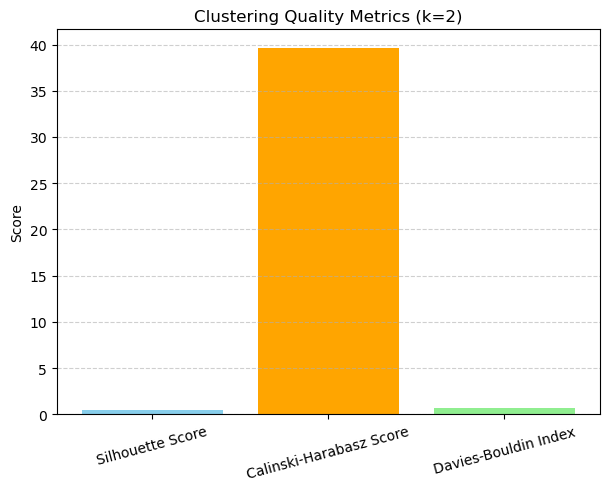

In [11]:
#question - A5(lab -5)
import matplotlib.pyplot as plt

# Existing metrics calculation (from previous step)
clustering_metrics = evaluate_clustering(X_cluster, cluster_labels)

# Print numeric values
print("\nClustering Metrics for K-Means (k=2)")
for metric, value in clustering_metrics.items():
    print(f"{metric}: {value:.4f}")

# ---- Optional Visualization ----
plt.figure(figsize=(7, 5))
plt.bar(clustering_metrics.keys(), clustering_metrics.values(), color=['skyblue', 'orange', 'lightgreen'])
plt.title('Clustering Quality Metrics (k=2)')
plt.ylabel('Score')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


C:\Users\Rithvik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rithvik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rithvik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rithvik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak o

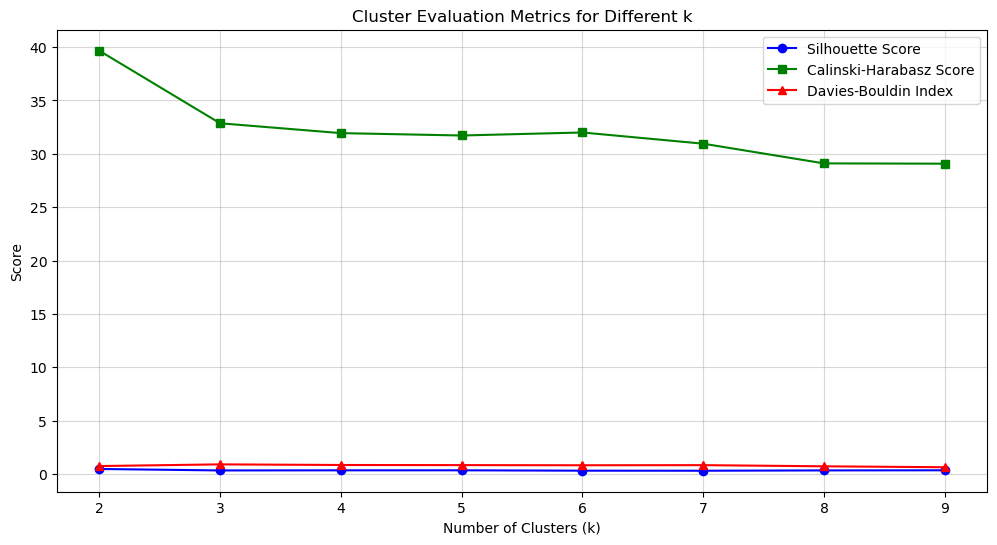

In [12]:
#question - A6(lab -5)
k_values = range(2, 10)  # You can increase this range if needed

silhouette_scores = []
calinski_scores = []
davies_scores = []

# Loop through different k values and calculate metrics
for k in k_values:
    model, labels, _ = perform_kmeans(X_cluster, clusters=k)
    metrics = evaluate_clustering(X_cluster, labels)
    silhouette_scores.append(metrics["Silhouette Score"])
    calinski_scores.append(metrics["Calinski-Harabasz Score"])
    davies_scores.append(metrics["Davies-Bouldin Index"])

# ---- Visualization of Metrics for Different k ----
plt.figure(figsize=(12, 6))

# Silhouette Score
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score', color='blue')
# Calinski-Harabasz Score
plt.plot(k_values, calinski_scores, marker='s', label='Calinski-Harabasz Score', color='green')
# Davies-Bouldin Index
plt.plot(k_values, davies_scores, marker='^', label='Davies-Bouldin Index', color='red')

plt.title('Cluster Evaluation Metrics for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.legend()
plt.grid(alpha=0.5)
plt.show()


C:\Users\Rithvik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rithvik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rithvik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rithvik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak o

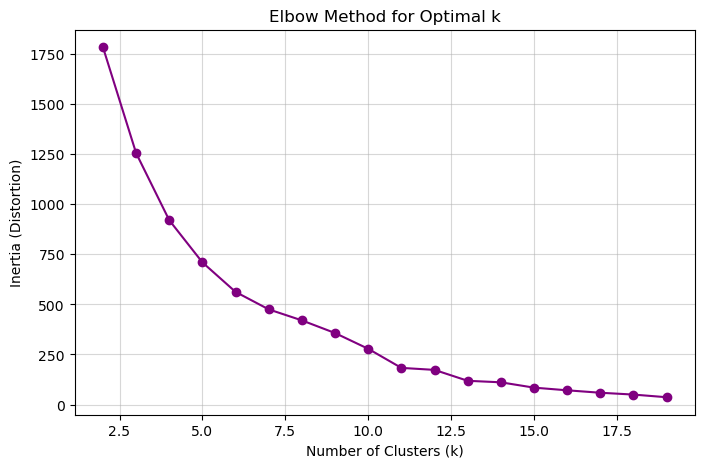

In [13]:
#question - A7(lab -5)
distortions = []
k_range = range(2, 20)  # You can adjust range as needed

# Compute inertia (sum of squared distances) for different k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_cluster)
    distortions.append(kmeans.inertia_)

# ---- Plot Elbow Curve ----
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(k_range, distortions, marker='o', color='purple')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Distortion)')
plt.grid(alpha=0.5)
plt.show()
